In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

###### Data Preprocessing

In [2]:
# set data dir
data_dir = '../dataset'

In [3]:
os.listdir(data_dir)

['single_prediction', 'test_set', 'training_set']

In [4]:
# set train/test/single_prediction path
train_dir = f'{data_dir}\\training_set'
test_dir = f'{data_dir}\\test_set'
single_pred_dir = f'{data_dir}\\single_prediction'

In [7]:
os.listdir(test_dir)

['cats', 'dogs']

In [8]:
os.listdir(train_dir)

['cats', 'dogs']

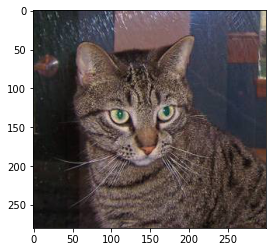

In [64]:
# Visualize an image of cat
first_cat_img = train_dir+'\\cats\\cat.1.jpg'
plt.imshow(imread(first_cat_img))

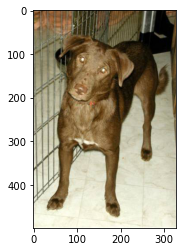

In [63]:
# Visualize an image of dog
first_dog_img = train_dir+'\\dogs\\dog.1.jpg'
plt.imshow(imread(first_cat_img))

In [19]:
# Length of cat images - trainset
len(os.listdir(train_dir+'\\cats'))

4000

In [20]:
# Length of dog images - trainset
len(os.listdir(train_dir+'\\dogs'))

4000

In [21]:
# Length of cat images - testset
len(os.listdir(test_dir+'\\cats'))

1000

In [22]:
# Length of dog images - testset
len(os.listdir(test_dir+'\\dogs'))

1000

In [43]:
# Find the avarage shape of images
def find_dim(path_1,path_2):
    dim1 = []
    dim2 = []
    
    for image_filename in os.listdir(path_1+'\\'+path_2):
        img = imread(path_1+'\\'+path_2+'\\'+image_filename)
        d1,d2,c = img.shape
        
        dim1.append(d1)
        dim2.append(d2)
    
    return dim1,dim2

In [44]:
# cat images on trainset
dim1, dim2 = find_dim(train_dir,'cats')

In [45]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(41, 768, 356.09925)

In [46]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(59, 1023, 409.61975)

In [47]:
# dog images on trainset
dim1, dim2 = find_dim(train_dir,'dogs')

In [48]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(45, 702, 364.84475)

In [49]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(57, 1050, 397.98225)

In [50]:
# cat images on testset
dim1, dim2 = find_dim(test_dir,'cats')

In [51]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(39, 500, 356.267)

In [52]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(59, 500, 413.064)

In [53]:
# dog images on testset
dim1, dim2 = find_dim(test_dir,'dogs')

In [54]:
np.min(dim1),np.max(dim1),np.mean(dim1)

(33, 500, 365.171)

In [55]:
np.min(dim2),np.max(dim2),np.mean(dim2)

(92, 500, 396.317)

In [4]:
# Custom shape
input_shape = (64,64,3)

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
# Traning data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

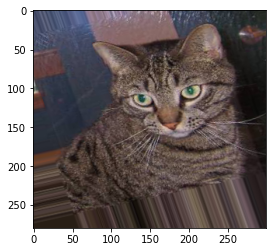

In [101]:
# Randomly transform a single image
plt.imshow(train_datagen.random_transform(imread(first_cat_img)))

In [102]:
# Generating the training set
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=32,
    color_mode='rgb',
    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [103]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [104]:
# Generating the test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False)

Found 2000 images belonging to 2 classes.


In [105]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

###### Building The Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [5]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [121]:
# Implement Early Stoping
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=0)

###### Train/Evaluate The Model

In [123]:
# model.fit(x=training_set, validation_data=test_set, epochs=25, callbacks=[early_stop])

Epoch 1/25
250/250 [==============================] - 128s 507ms/step - loss: 0.6861 - accuracy: 0.5665 - val_loss: 0.6544 - val_accuracy: 0.5840
Epoch 2/25
250/250 [==============================] - 137s 546ms/step - loss: 0.6344 - accuracy: 0.6417 - val_loss: 0.6215 - val_accuracy: 0.6450
Epoch 3/25
250/250 [==============================] - 183s 733ms/step - loss: 0.6057 - accuracy: 0.6697 - val_loss: 0.5724 - val_accuracy: 0.7155
Epoch 4/25
250/250 [==============================] - 187s 747ms/step - loss: 0.5826 - accuracy: 0.6917 - val_loss: 0.5461 - val_accuracy: 0.7215
Epoch 5/25
250/250 [==============================] - 165s 659ms/step - loss: 0.5690 - accuracy: 0.7019 - val_loss: 0.5676 - val_accuracy: 0.7055
Epoch 6/25
250/250 [==============================] - 161s 645ms/step - loss: 0.5690 - accuracy: 0.7031 - val_loss: 0.5401 - val_accuracy: 0.7400
Epoch 7/25
250/250 [==============================] - 160s 640ms/step - loss: 0.5460 - accuracy: 0.7185 - val_loss: 0.5138 -

In [124]:
import pandas as pd
from tensorflow.keras.models import load_model

In [125]:
# Metrics as dataframe
metrics = pd.DataFrame(model.history.history)

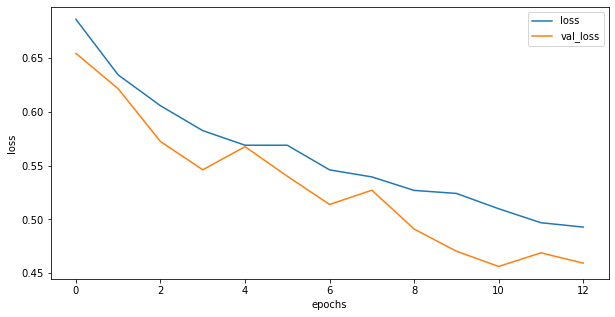

In [134]:
# loss vs val_loss
metrics[['loss','val_loss']].plot(figsize=(10,5))
plt.xlabel('epochs')
plt.ylabel('loss')

plt.savefig('losses.png',dpi=200)

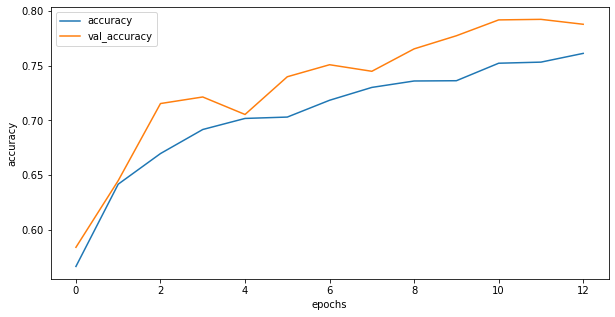

In [135]:
# loss vs val_loss
metrics[['accuracy','val_accuracy']].plot(figsize=(10,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.savefig('accuracy.png',dpi=200)

In [136]:
# Evaluate the model
model.evaluate(test_set, verbose=0)

[0.45919907093048096, 0.7879999876022339]

###### Save/Load the model

In [138]:
model.save('cat_dog_classifier.h5')

In [139]:
model = load_model('./cat_dog_classifier.h5')

In [140]:
model.evaluate(test_set, verbose=0)

[0.45919907093048096, 0.7879999876022339]

###### Make Prediction/Error Analysis

In [150]:
pred = model.predict(test_set)

In [151]:
pred

array([[0.5567228 ],
       [0.6576641 ],
       [0.34108603],
       ...,
       [0.23404044],
       [0.20366219],
       [0.7998633 ]], dtype=float32)

In [154]:
pred = (pred > 0.5).astype('int32')

In [155]:
pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
print(classification_report(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78      1000
           1       0.76      0.84      0.80      1000

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [159]:
print(confusion_matrix(test_set.classes,pred))

[[732 268]
 [156 844]]


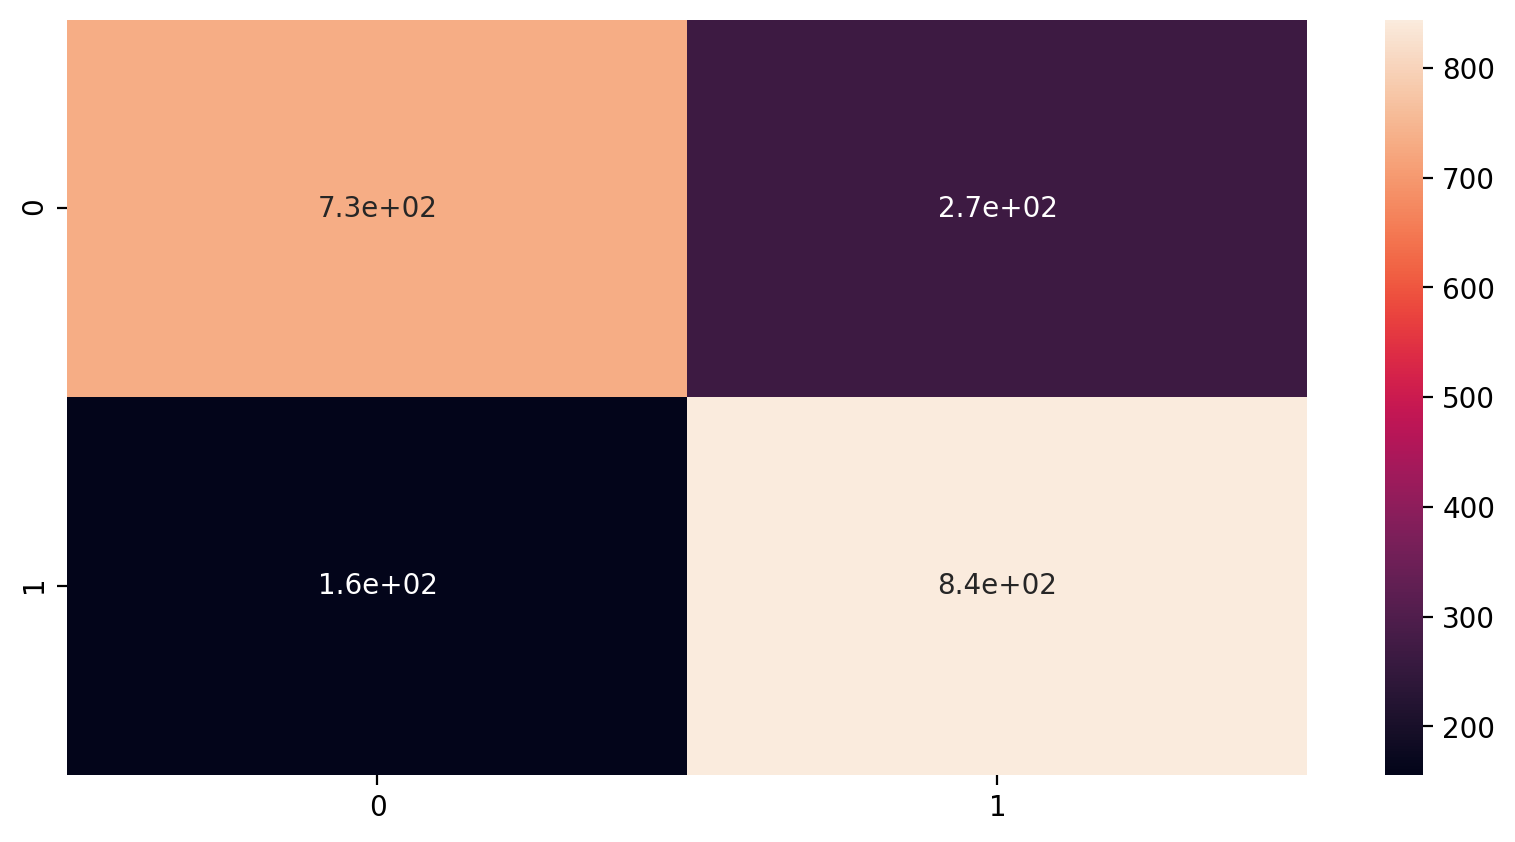

In [164]:
plt.figure(figsize=(10,5), dpi=200)
sns.heatmap(data=confusion_matrix(test_set.classes,pred), annot=True)
plt.savefig('heatmap.png')

###### Single Image Prediction

In [166]:
os.listdir(single_pred_dir)

['cat_or_dog_1.jpg', 'cat_or_dog_2.jpg']

In [168]:
path_to_image_1 = single_pred_dir+'\\cat_or_dog_1.jpg'
path_to_image_2 = single_pred_dir+'\\cat_or_dog_2.jpg'

In [167]:
from tensorflow.keras.preprocessing import image

In [176]:
# Load images as Pillow format
img1 = image.load_img(path_to_image_1, target_size=input_shape[:2])
img2 = image.load_img(path_to_image_2, target_size=input_shape[:2])

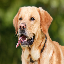

In [178]:
img1

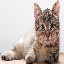

In [179]:
img2

In [184]:
# PILL to Array
img1_to_array = np.expand_dims(image.img_to_array(img1),axis=0)
img2_to_array = np.expand_dims(image.img_to_array(img2),axis=0)

In [185]:
img1_to_array.shape

(1, 64, 64, 3)

In [186]:
img2_to_array.shape

(1, 64, 64, 3)

In [188]:
# Predictions
result_1 = model.predict(img1_to_array)
result_1

array([[1.]], dtype=float32)

In [189]:
result_2 = model.predict(img2_to_array)
result_2

array([[0.]], dtype=float32)

In [190]:
def make_pred(img):
    result = model.predict(img)
    if result > 0.5:
        return "It's a dog"
    else:
        return "It's a cat"